# Welcome To Wine Quality Analysis Process
In this first case study, you'll perform the entire data analysis process to investigate a dataset on wine quality. Along the way, you'll explore new ways of manipulating data with NumPy and Pandas, as well as powerful visualization tools with Matplotlib.

We're going to investigate this [dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) on physicochemical properties and quality ratings of red and white wine samples. Let's take a closer look at its attributes and pose some questions for our analysis!

## 1. Asking Questions
  
* Is a certain type of wine (red or white) associated with higher quality?
* Do wines with higher alcoholic content receive better ratings?
* Do sweeter wines (more residual sugar) receive better ratings?
* What level of acidity is associated with the highest quality?
* What chemical characteristics are most important in predicting the quality of wine?

*Note:* Reading CSV files isn't always the same process - you won't always know what to expect. Sometimes there could be different delimiters, missing column labels, blank lines, comments, header text, etc. Most of the time, quick trial and error with Pandas does the trick. Alternatively, you can inspect the file with a text editor or spreadsheet program, like Google Sheets. Although, this is not recommended for large files, as they could really slow or crash the program. A [better way](https://askubuntu.com/questions/261900/how-do-i-open-a-text-file-in-my-terminal) to inspect large files would be with your terminal.

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

red_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                    sep = ';')
white_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                      sep = ';')

In [9]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
# The size of datasets
print("Red Wine dataset has {} samples\n\nWhite Wine dataset has {} samples".
      format(red_df.shape[0], white_df.shape[0]))

Red Wine dataset has 1599 samples

White Wine dataset has 4898 samples


In [17]:
# Columns
print("Red Wine dataset has {} columns\n\nWhite Wine dataset has {} columns".
      format(red_df.shape[1], white_df.shape[1]))

Red Wine dataset has 12 columns

White Wine dataset has 12 columns



Attributes in Each Dataset:

**Physicochemical Properties**
1. Fixed Acidity
2. Volatile Acidity
3. Citric Acid
4. Residual Sugar
5. Chlorides
6. Free Sulfur Dioxide
7. Total Sulfur Dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

**Quality Rating**  
12 . Quality - Score between 0 and 10 (median of at least 3 evaluations made by wine experts)

In [22]:
# Missing values
print("Missing values in Red Wine dataset:\n\n{}\n\nMissing values in White Wine dataset:\n\n{}".
      format(red_df.isna().sum() , white_df.isna().sum()))

Missing values in Red Wine dataset:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing values in White Wine dataset:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [24]:
# Duplicates
print("Red Wine dataset has {} duplicated values\n\nWhite Wine dataset has {} duplicated values".
      format(red_df.duplicated().sum() , white_df.duplicated().sum()))

Red Wine dataset has 240 duplicated values

White Wine dataset has 937 duplicated values


In [26]:
# Drop duplicates
red_df = red_df.drop_duplicates();
white_df = white_df.drop_duplicates();

print("Now Red Wine dataset has {} duplicated values\n\nAnd White Wine dataset has {} duplicated values".
      format(red_df.duplicated().sum() , white_df.duplicated().sum()))

Now Red Wine dataset has 0 duplicated values

And White Wine dataset has 0 duplicated values


In [28]:
# Unique values
print("Unique values in Red Wine dataset:\n\n{}\n\nUnique values in White Wine dataset:\n\n{}".
      format(red_df.nunique() , white_df.nunique()))

Unique values in Red Wine dataset:

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Unique values in White Wine dataset:

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


In [30]:
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

In [32]:
red_df['color'] = color_red
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [34]:
white_df['color'] = color_white
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


In [51]:
# Append red_df & white_df
wine_df = pd.concat([red_df, white_df], ignore_index=True)

# View the combined dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [46]:
wine_df.to_csv('winequality_edited.csv', index=False)

# Exploring with Visuals
Perform exploratory data analysis (EDA) on your newly combined dataframe. Create some visuals to answer these quiz questions below.

* Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol
* Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol

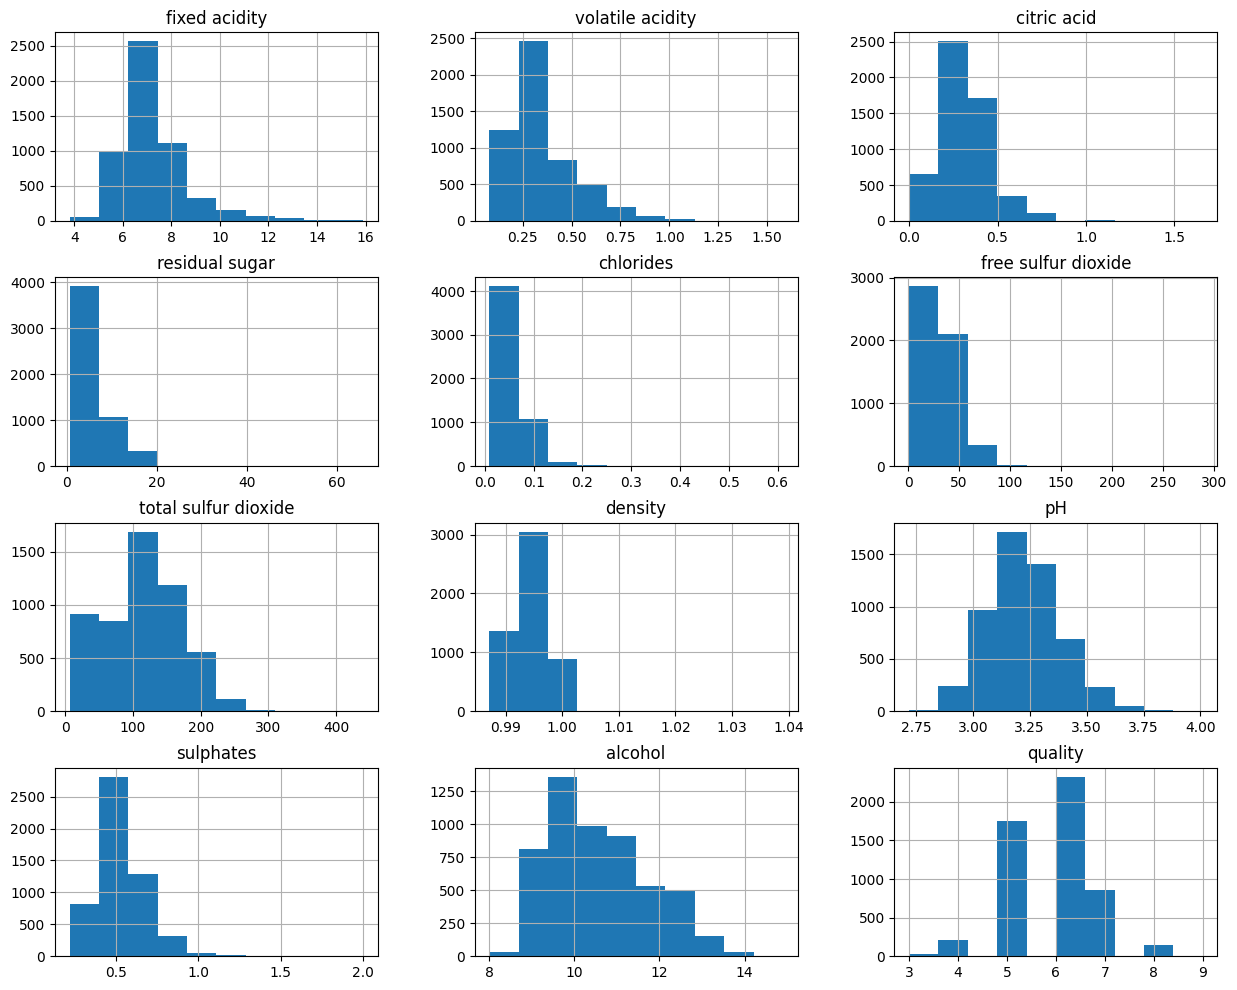

In [48]:
wine_df.hist(figsize=(15,12));

# Summative statistics: `Pandas GroupBy` & `Pandas Query`
## Drawing Conclusions Using Groupby
Investigate two questions about this data using pandas' `groupby` (Q1 + Q2) and pandas' `query` (Q3 + Q4). Here are some questions:

**Q1: Is a certain type of wine (red or white) associated with higher quality?**
For this question, compare the average quality of red wine with the average quality of white wine with `groupby`. To do this group by color and then find the mean quality of each group.

**Q2: What level of acidity (pH value) receives the highest average rating?**
This question is more tricky because unlike color, which has clear categories you can group by (red and white) pH is a quantitative variable without clear categories. However, there is a simple fix to this. You can create a categorical variable from a quantitative variable by creating your own categories. pandas' cut function let's you "cut" data in groups. Using this, create a new column called `acidity_levels` with these categories:

**Acidity Levels:**
1. High: Lowest 25% of pH values
1. Moderately High: 25% - 50% of pH values
1. Medium: 50% - 75% of pH values
1. Low: 75% - max pH value
Here, the data is being split at the 25th, 50th, and 75th percentile. 

**Q3: Do wines with higher alcoholic content receive better ratings?**

**Q4: Do sweeter wines receive better ratings??**

For these 2 questions, separate the wine data into 2 groups (Above Average **VS** Below Average) based on its quality (`alcohol` & `residual sugar`) and compare the 2 groups' Average Rating 

### Q1: Is a certain type of wine associated with higher quality?

In [57]:
# Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby('color').mean().quality

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

**Answer: White wine generally has higher Quality Rating**

### Q2: What level of acidity (pH value) receives the highest average rating?

In [64]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe().pH

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [78]:
# Bin edges that will be used to classify the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]

In [72]:
# Labels for the four acidity level groups
bin_names = ['high', 'mid_high', 'medium', 'low'] # Name each acidity level category

In [80]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for the successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mid_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mid_high
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


In [86]:
# Find the mean quality of each acidity level using groupby
mean_quality = wine_df.groupby('acidity_levels', observed=True)['quality'].mean()

# Display the result
mean_quality

acidity_levels
high        5.728024
mid_high    5.766917
medium      5.840183
low         5.847470
Name: quality, dtype: float64

In [88]:
# Save changes for the next section
wine_df.to_csv('winequality_edited.csv', index=False)

**Answer: Wine with the Lowest Acidic Level (pH > 4.01) has the Highest Average Rating**

### Q3: Do wines with higher alcoholic content receive better ratings?

In [104]:
# get the median amount of alcohol content
wine_df.alcohol.median()

10.4

In [107]:
# select samples with alcohol content less than the median
low_alcohol = wine_df[wine_df.alcohol < 10.3]

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df[wine_df.alcohol >= 10.3]

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [109]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.428057553956834, 6.122072391767211)

**Answer: Yes. Wine with Higher Alcoholic Content receives Higher Rating**

### Q4: Do sweeter wines receive better ratings?

In [98]:
# get the median amount of residual sugar
wine_df['residual sugar'].median()

2.7

In [113]:
# select samples with residual sugar less than the median
low_sugar = wine_df[wine_df['residual sugar'] < 3]

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df[wine_df['residual sugar'] >= 3]

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [115]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.793610911701364, 5.797947908445146)

**Answer: Not really, although the Rating is slightly higher for Sweeter Wine**

### Q5: What chemical characteristics are most important in predicting the quality of wine?

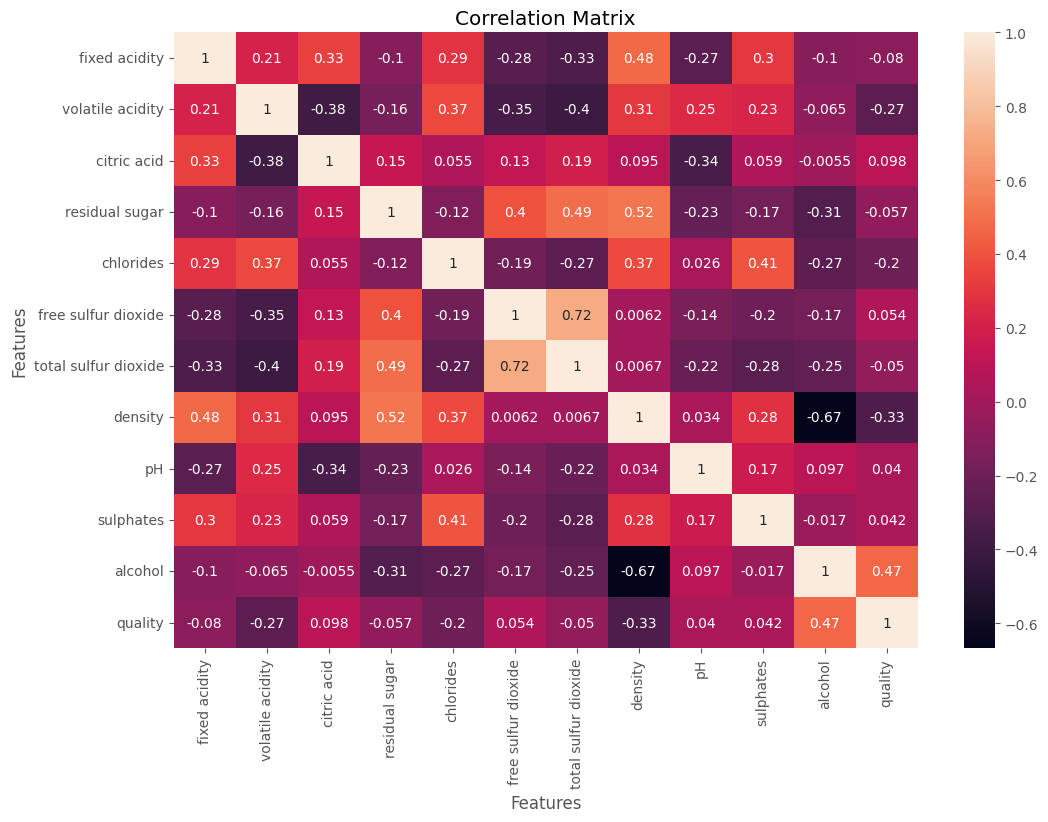

In [137]:
#Check the correlation between Characteristics
df_numeric = wine_df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [143]:
# Calculate the correlation matrix
df_numeric = wine_df.select_dtypes(include=[np.number])
correlation_mat = df_numeric.corr(method="pearson")

# Unstack the correlation matrix to get all correlation pairs
corr_pairs = correlation_mat.unstack()

# Filter correlation pairs for "quality" only and sort by absolute values
quality_corr = corr_pairs['quality'].drop('quality')  # Exclude "quality" correlating with itself
quality_corr_sorted = quality_corr.abs().sort_values(ascending=False)

# Display the sorted correlations
quality_corr_sorted


alcohol                 0.469422
density                 0.326434
volatile acidity        0.265205
chlorides               0.202137
citric acid             0.097954
fixed acidity           0.080092
residual sugar          0.056830
free sulfur dioxide     0.054002
total sulfur dioxide    0.050296
sulphates               0.041884
pH                      0.039733
dtype: float64

**Answer: In Wine Quality Prediction, we should consider the following 4 Chemical Properties:**

**1. Alcoholic Content**

**2. Density**

**3. Volatile Acidity**

**4. Chlorides**